## Diamonds Dataset Preprocessing

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('diamonds.csv')

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [ ]:
df.isnull().sum(axis=0) # no null values, but there are some rows where dimensions (x, y, z) are zero

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
# Remove entries where dimensions == 0
zero_x = list(df[df['x']==0].index)
zero_y = list(df[df['y']==0].index)
zero_z = list(df[df['z']==0].index)
drop_rows = set(zero_x+zero_y+zero_z)
drop_rows = list(drop_rows)
print(len(drop_rows))

df = df.drop(drop_rows)
df.describe()

20


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# Additional pre-processing to remove 'extreme' outliers - based on plots derived in Part 1
outliers = (df['depth'] < 50) | (df['depth'] > 75) | (df['table'] > 80) | (df['y'] > 20) | (df['z'] > 10)

df1 = df.drop(outliers[outliers==True].index)
df1.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000
mean,26971.506919,0.797658,61.749703,57.455849,3930.822649,5.731540,5.733369,3.539318
std,15570.488544,0.473771,1.420096,2.226151,3987.238899,1.119404,1.111273,0.691611
min,1.000000,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13488.250000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40454.750000,1.040000,62.500000,59.000000,5323.750000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


In [ ]:
# Convert columns with string data types to categorical using one-hot encoding
df_cut = pd.get_dummies(df1['cut'], prefix='cut', dtype=int, drop_first=True)
df_color = pd.get_dummies(df1['color'], prefix='col', dtype=int, drop_first=True)
df_clarity = pd.get_dummies(df1['clarity'], prefix='clar', dtype=int, drop_first=True)

In [ ]:
# Normalize non-categorical features
cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
for col in cols:
    df1[col] = (df1[col] - df1[col].min()) / (df1[col].max() - df1[col].min())

df1.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000,53910.000000
mean,26971.506919,0.124253,0.480250,0.401551,3930.822649,0.285526,0.299325,0.417820
std,15570.488544,0.098497,0.062285,0.061838,3987.238899,0.159687,0.161993,0.117024
min,1.000000,0.000000,0.000000,0.000000,326.000000,0.000000,0.000000,0.000000
25%,13488.250000,0.041580,0.447368,0.361111,949.000000,0.139800,0.151603,0.311337
50%,26973.500000,0.103950,0.482456,0.388889,2401.000000,0.281027,0.295918,0.416244
75%,40454.750000,0.174636,0.513158,0.444444,5323.750000,0.400856,0.416910,0.502538
max,53940.000000,1.000000,1.000000,1.000000,18823.000000,1.000000,1.000000,1.000000


In [ ]:
# Create a new data frame using the one-hot encoded columns and dropping unnecessary ones
df2 = pd.concat([df1, df_cut, df_color, df_clarity], axis=1)
df2 = df2.drop(columns=['Unnamed: 0', 'cut', 'color', 'clarity'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53910 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53910 non-null  float64
 1   depth          53910 non-null  float64
 2   table          53910 non-null  float64
 3   price          53910 non-null  int64  
 4   x              53910 non-null  float64
 5   y              53910 non-null  float64
 6   z              53910 non-null  float64
 7   cut_Good       53910 non-null  int32  
 8   cut_Ideal      53910 non-null  int32  
 9   cut_Premium    53910 non-null  int32  
 10  cut_Very Good  53910 non-null  int32  
 11  col_E          53910 non-null  int32  
 12  col_F          53910 non-null  int32  
 13  col_G          53910 non-null  int32  
 14  col_H          53910 non-null  int32  
 15  col_I          53910 non-null  int32  
 16  col_J          53910 non-null  int32  
 17  clar_IF        53910 non-null  int32  
 18  clar_SI1   

## Linear Regression (manual implementation)

In [ ]:
# Create test/training split for entire data frame
df2_shuffled = df2.sample(frac=1, replace=False, random_state=574)
cut_pt = int(0.8*df2.shape[0])
train = df2_shuffled[:cut_pt]
test = df2_shuffled[cut_pt:]

print(train.shape)
print(test.shape)

(43128, 24)
(10782, 24)


In [ ]:
# Create data matrices for X, y training and test sets
y_train = np.array(train['price']).reshape(-1, 1)
y_test = np.array(test['price']).reshape(-1, 1)

X_train = np.hstack((np.ones(train.shape[0]).reshape(-1, 1), train.drop(columns = 'price')))
X_test = np.hstack((np.ones(test.shape[0]).reshape(-1, 1), test.drop(columns = 'price')))

print(f'Shape of X_train: {X_train.shape} \nShape of y_train: {y_train.shape} \nShape of X_test: {X_test.shape} \nShape of y_test: {y_test.shape}')

Shape of X_train: (43128, 24) 
Shape of y_train: (43128, 1) 
Shape of X_test: (10782, 24) 
Shape of y_test: (10782, 1)


In [ ]:
# Calculate weights with the OLS equation
w = np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), np.matmul(X_train.T, y_train))
print(w)

[[ -2162.8306093 ]
 [ 56005.54567782]
 [  1913.51171134]
 [  -848.27427055]
 [-10095.02579352]
 [ 12483.85819817]
 [-15014.71333869]
 [   502.40646566]
 [   778.17892455]
 [   746.36372042]
 [   645.14807214]
 [  -220.92133469]
 [  -268.54100141]
 [  -484.40087128]
 [  -989.81215805]
 [ -1478.51489893]
 [ -2413.21076055]
 [  5233.98103069]
 [  3571.84049581]
 [  2620.60930673]
 [  4477.50175834]
 [  4177.56406762]
 [  4900.00566749]
 [  4848.59381085]]


In [ ]:
# Get predictions
y_hat_train = np.matmul(X_train, w)
RMSE_train = np.sqrt(sum((y_train - y_hat_train)**2)/len(y_train))[0]

y_hat_test = np.matmul(X_test, w)
RMSE_test = np.sqrt(sum((y_test - y_hat_test)**2)/len(y_test))[0]

print(f'Training RMSE = {RMSE_train} \nTest RMSE = {RMSE_test}')

Training RMSE = 1121.4384933574365 
Test RMSE = 1132.9440461728464


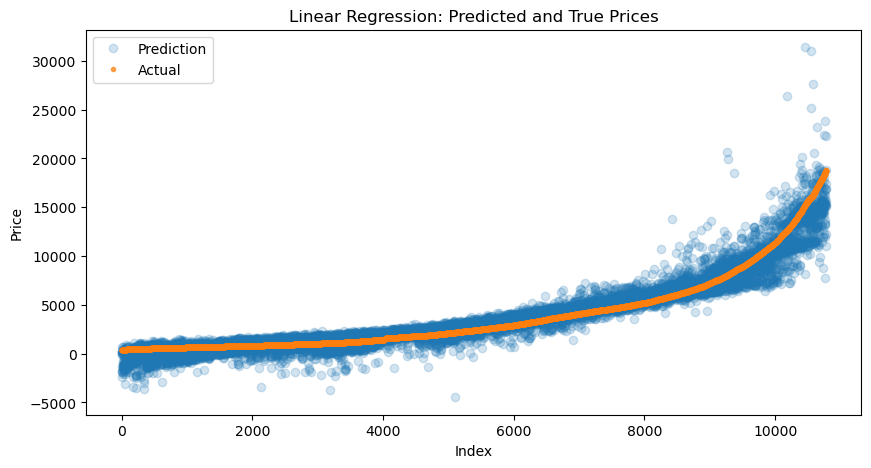

In [ ]:
# Plot predictions vs actual data
target_data = np.column_stack((y_test, y_hat_test))
target_df = pd.DataFrame(target_data, columns=['Actual', 'Predicted'])
target_df = target_df.sort_values(by='Actual', ignore_index=True)
target_df.head()

fig = plt.subplots(figsize=(10, 5))
plt.plot(target_df.iloc[:, 1], 'o', alpha=0.2, label='Prediction')
plt.plot(target_df.iloc[:, 0], '.', alpha=0.7, label='Actual')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Linear Regression: Predicted and True Prices')
plt.legend()
plt.savefig('ols_pred_actual_vs_ind.png', bbox_inches='tight')
plt.show()

## Ridge Regression

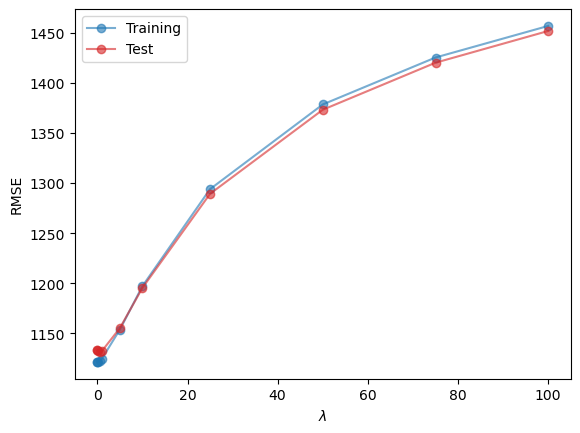

In [ ]:
# Initial pass at tuning lambda
#lambda_vec = np.arange(1, 100)
lambda_vec = np.array([0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50, 75, 100])
RMSE_vec_test = np.empty(len(lambda_vec))
RMSE_vec_train = np.empty(len(lambda_vec))
for i, lambda_val in enumerate(lambda_vec):
    w_ridge = np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train) + lambda_val*np.identity(X_train.shape[1])), np.matmul(X_train.T, y_train))
    y_hat_test_ridge = np.matmul(X_test, w_ridge)
    RMSE_vec_test[i] = np.sqrt(sum((y_test - y_hat_test_ridge)**2)/len(y_test))[0]
    y_hat_train_ridge = np.matmul(X_train, w_ridge)
    RMSE_vec_train[i] = np.sqrt(sum((y_train - y_hat_train_ridge)**2)/len(y_train))[0]

plt.plot(lambda_vec, RMSE_vec_train, '-o', color='tab:blue', alpha=0.6, label='Training')
plt.plot(lambda_vec, RMSE_vec_test, '-o', color='tab:red', alpha=0.6, label='Test')
plt.xlabel(r'$\lambda$')
plt.ylabel('RMSE')
plt.legend()
plt.show()

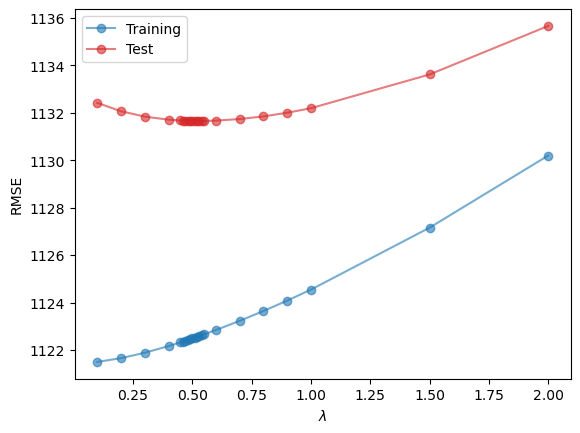

In [ ]:
# Tuning lambda
lambda_vec = np.array([0.1, 0.2, 0.3, 0.4, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2])
RMSE_vec_test = np.empty(len(lambda_vec))
RMSE_vec_train = np.empty(len(lambda_vec))
for i, lambda_val in enumerate(lambda_vec):
    w_ridge = np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train) + lambda_val*np.identity(X_train.shape[1])), np.matmul(X_train.T, y_train))
    y_hat_test_ridge = np.matmul(X_test, w_ridge)
    RMSE_vec_test[i] = np.sqrt(sum((y_test - y_hat_test_ridge)**2)/len(y_test))[0]
    y_hat_train_ridge = np.matmul(X_train, w_ridge)
    RMSE_vec_train[i] = np.sqrt(sum((y_train - y_hat_train_ridge)**2)/len(y_train))[0]

plt.plot(lambda_vec, RMSE_vec_train, '-o', color='tab:blue', alpha=0.6, label='Training')
plt.plot(lambda_vec, RMSE_vec_test, '-o', color='tab:red', alpha=0.6, label='Test')
plt.xlabel(r'$\lambda$')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [ ]:
ridge_lambda = lambda_vec[np.argmin(RMSE_vec_test)]
ridge_lambda

0.53

In [ ]:
# Calculate weight vector with chosen lambda.
w_ridge = np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train) + ridge_lambda*np.identity(X_train.shape[1])), np.matmul(X_train.T, y_train))
print(w_ridge)

[[-2767.78481404]
 [54075.35503725]
 [  833.57614245]
 [ -871.47984341]
 [-7706.71367993]
 [ 7581.38692761]
 [-9864.76902848]
 [  542.70996117]
 [  810.40113995]
 [  763.20420001]
 [  690.8176189 ]
 [ -220.17035817]
 [ -271.3743847 ]
 [ -484.15760539]
 [ -984.67600874]
 [-1463.12310188]
 [-2392.36975253]
 [ 5219.75502965]
 [ 3538.30109537]
 [ 2591.29144752]
 [ 4448.74323985]
 [ 4148.15919462]
 [ 4882.6980309 ]
 [ 4827.98989558]]


In [ ]:
# Calculate predictions and RMSE using the ridge weight vector
y_hat_test_ridge = np.matmul(X_test, w_ridge)
RMSE_ridge_test = np.sqrt(sum((y_test - y_hat_test_ridge)**2)/len(y_test))[0]

y_hat_train_ridge = np.matmul(X_train, w_ridge)
RMSE_ridge_train = np.sqrt(sum((y_train - y_hat_train_ridge)**2)/len(y_train))[0]

print(f'Training RMSE = {RMSE_ridge_train} \nTest RMSE = {RMSE_ridge_test}')

Training RMSE = 1122.5920516260994 
Test RMSE = 1131.6519765607688


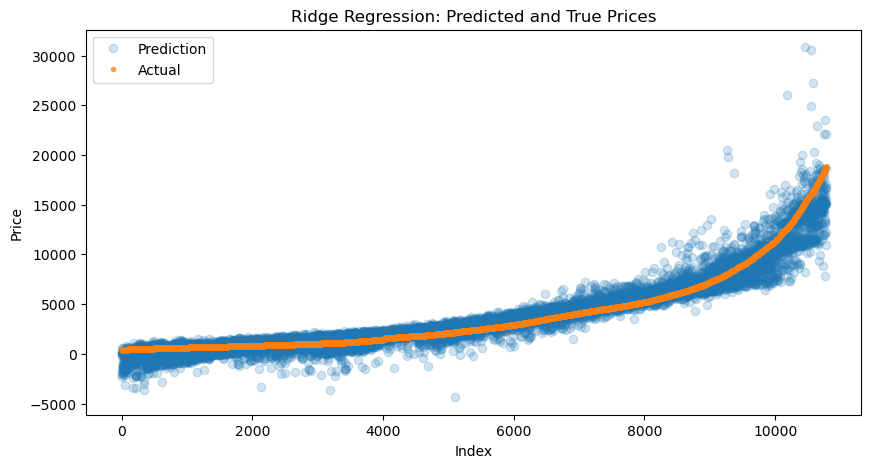

In [ ]:
# Plot predictions vs actual data
target_data_ridge = np.column_stack((y_test, y_hat_test_ridge))
target_df_ridge = pd.DataFrame(target_data_ridge, columns=['Actual', 'Predicted'])
target_df_ridge = target_df_ridge.sort_values(by='Actual', ignore_index=True)
target_df_ridge.head()

fig = plt.subplots(figsize=(10, 5))
plt.plot(target_df_ridge.iloc[:, 1], 'o', alpha=0.2, label='Prediction')
plt.plot(target_df_ridge.iloc[:, 0], '.', alpha=0.7, label='Actual')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Ridge Regression: Predicted and True Prices')
plt.legend()
plt.savefig('ridge_pred_actual_vs_ind.png', bbox_inches='tight')
plt.show()

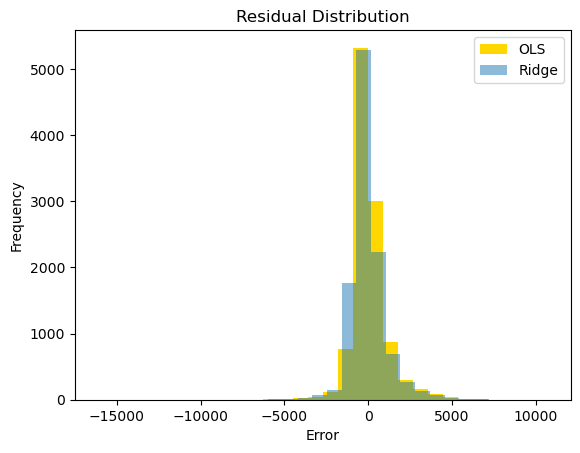

In [ ]:
# Residual plot
plt.hist(y_test - y_hat_test, bins=30, color='gold', alpha=1, label='OLS')
plt.hist(y_test - y_hat_test_ridge, bins=30, color='tab:blue', alpha=0.5, label='Ridge')
plt.title("Residual Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()
plt.savefig('residual_plot.png', bbox_inches='tight')
plt.show()

## Gradient Descent Implementation for Ridge Regression

In [ ]:
first_term = -2*np.matmul(X_train.T, y_train)
second_term_part = 2*np.matmul(X_train.T, X_train)
w = np.ones((X_train.shape[1], 1))*1000
alpha = 9e-6
nabla_J = np.ones((X_train.shape[1], 1))

while np.linalg.norm(nabla_J) > 0.01:
    nabla_J = first_term + np.matmul(second_term_part, w) + 2*ridge_lambda*w
    w = w - alpha*nabla_J
    yhat = np.matmul(X_train, w)

RMSE = np.sqrt(sum((y_train - yhat)**2)/len(y_train))[0]
print(f'w: {w} \nRMSE: {RMSE}')

w: [[-2767.78511226]
 [54075.35501059]
 [  833.57540337]
 [ -871.47985521]
 [-7706.7147121 ]
 [ 7581.38569   ]
 [-9864.76586925]
 [  542.70996655]
 [  810.40114206]
 [  763.20420179]
 [  690.81762209]
 [ -220.17035816]
 [ -271.37438484]
 [ -484.15760526]
 [ -984.67600826]
 [-1463.12310058]
 [-2392.36975203]
 [ 5219.75503247]
 [ 3538.30109941]
 [ 2591.29145123]
 [ 4448.7432436 ]
 [ 4148.15919825]
 [ 4882.69803383]
 [ 4827.98989928]] 
RMSE: 1122.5920519951078
